# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.786387e+01     1.490291e+01
 * time: 0.0018591880798339844
     1     3.769170e+01     1.084845e+01
 * time: 0.007133007049560547
     2     2.875530e+01     4.864519e+00
 * time: 0.013681173324584961
     3     2.323559e+01     3.214344e+00
 * time: 0.01923513412475586
     4     2.090726e+01     1.743400e+00
 * time: 0.024831056594848633
     5     2.031409e+01     3.620179e+00
 * time: 0.02951216697692871
     6     1.954574e+01     2.565349e+00
 * time: 0.03412818908691406
     7     1.860774e+01     1.900829e+00
 * time: 0.03983712196350098
     8     1.832561e+01     2.513359e+00
 * time: 0.044486045837402344
     9     1.794825e+01     1.532518e+00
 * time: 0.049111127853393555
    10     1.765199e+01     9.828332e-01
 * time: 0.0538182258605957
    11     1.743382e+01     1.249234e+00
 * time: 0.05858016014099121
    12     1.731876e+01     9.794252e-01
 * time: 0.06313419342041016
    13     1.731273e+01     1.191401e+00
 *

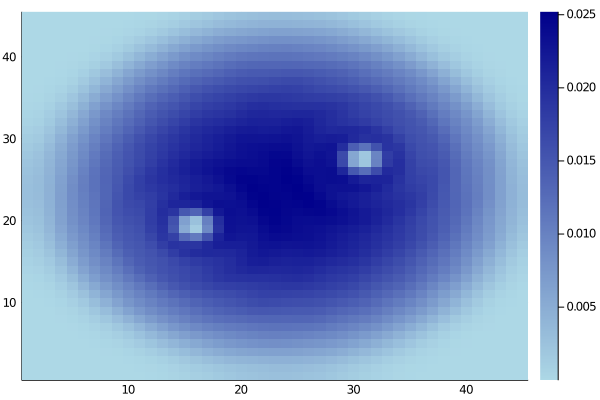

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)